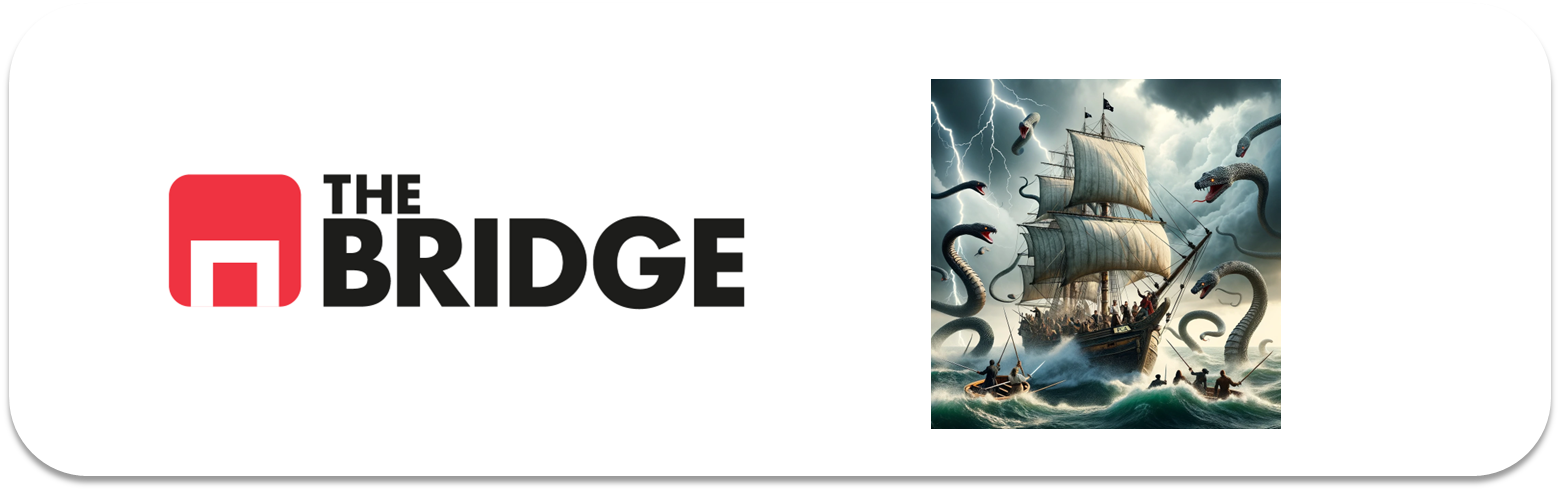

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [3]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_14/Unidad_02/Practica_Obligatoria/data/credit_npo.csv")

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [40]:
df_clean = df.dropna()

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [30]:
categorical_vars = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate",
    "NumberRealEstateLoansOrLines",
    "NumberOfTime60-89DaysPastDueNotWorse",
]


def categorize_column(column):
    column = pd.to_numeric(column, errors="coerce")  # Convertir a numérico, forzando NaN si hay valores no válidos
    max_val = max(column.max(skipna=True), 3)  # Ignorar NaN al calcular el máximo
    return pd.cut(column, bins=[-1, 0, 2, max_val], labels=["0", "1-2", "3+"], right=True)

for col in categorical_vars:
    df_clean.loc[:, col] = categorize_column(df_clean[col].astype(str))  # Convertir a str por si acaso y luego a numérico

df_clean[categorical_vars].head()
df_clean[categorical_vars] = df_clean[categorical_vars].dropna().reset_index(drop=True)


/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_5999/3150583229.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[categorical_vars] = df_clean[categorical_vars].dropna().reset_index(drop=True)


In [43]:
# Volver a cargar el dataset original para limpiar desde cero
df_clean = df.copy()

# Asegurar que las columnas categóricas sean numéricas antes de categorizar
for col in categorical_vars:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")  # Convertir a numérico, forzando NaN si hay valores no válidos

# Verificar si hay valores nulos en las columnas categóricas antes de aplicar la categorización
missing_before = df_clean[categorical_vars].isnull().sum()

# Aplicar categorización evitando errores con NaN
def categorize_column(column):
    if column.isnull().all():  # Si toda la columna es NaN, devolver NaN
        return column
    max_val = max(column.max(skipna=True), 3)  # Ignorar NaN al calcular el máximo
    return pd.cut(column, bins=[-1, 0, 2, max_val], labels=["0", "1-2", "3+"], right=True)

for col in categorical_vars:
    df_clean[col] = categorize_column(df_clean[col])

# Verificar si hay valores nulos después de la categorización
missing_after = df_clean[categorical_vars].isnull().sum()

# Mostrar comparación de valores nulos antes y después
missing_before, missing_after

(NumberOfTime30-59DaysPastDueNotWorse    0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 dtype: int64,
 NumberOfTime30-59DaysPastDueNotWorse    0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 dtype: int64)

In [47]:
# Verificar si hay valores nulos en todo el dataset después de la categorización
missing_values_after_categorization = df_clean.isnull().sum()
missing_values_after_categorization[missing_values_after_categorization > 0]

MonthlyIncome         721
NumberOfDependents    177
dtype: int64

In [48]:
# Eliminar filas con valores nulos en MonthlyIncome y NumberOfDependents
df_clean = df_clean.dropna(subset=["MonthlyIncome", "NumberOfDependents"]).reset_index(drop=True)

# Verificar que no quedan valores nulos
missing_values_final = df_clean.isnull().sum()
missing_values_final[missing_values_final > 0]

Series([], dtype: int64)

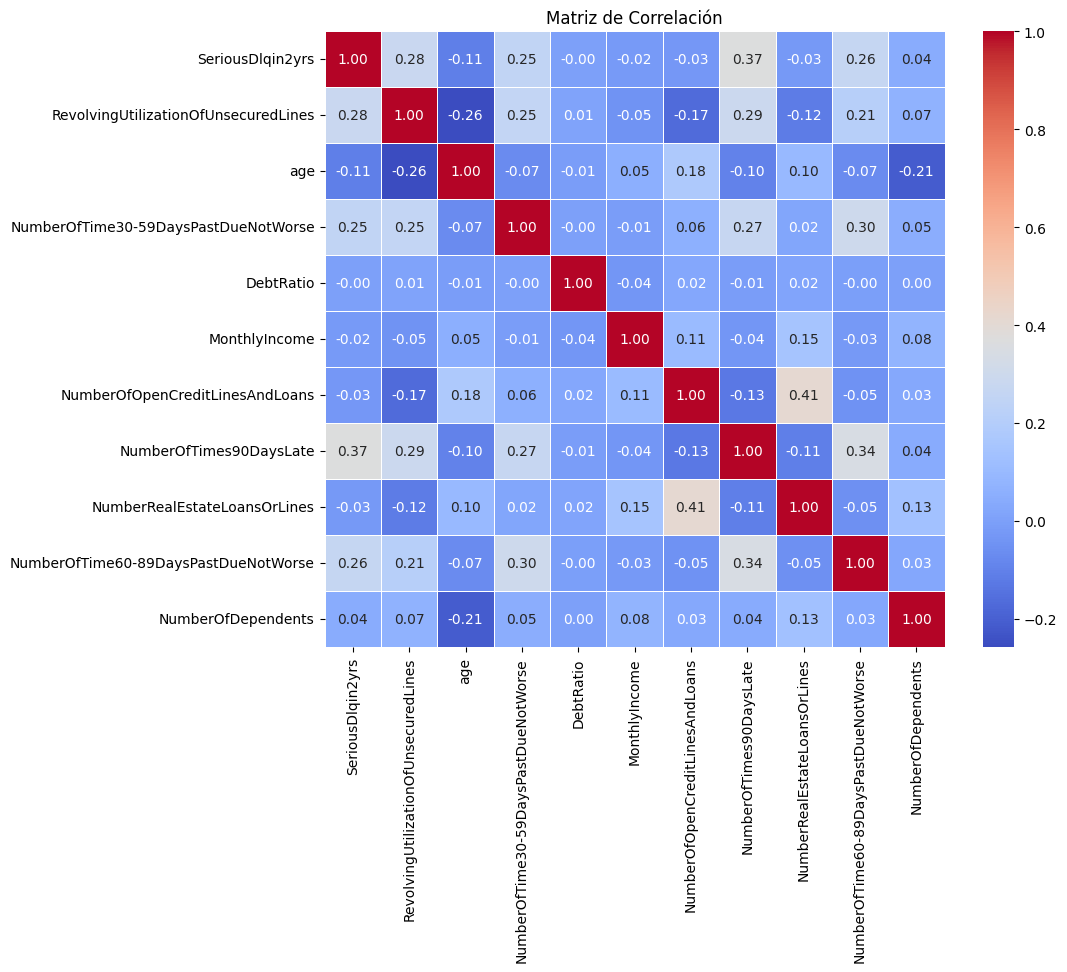

""


In [49]:
#2.1
# Convertimos variables categóricas a numéricas para la correlación
df_encoded = df_clean.copy()
for col in categorical_vars:
    df_encoded[col] = df_encoded[col].cat.codes

# Calculamos la matriz de correlación
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Filtramos features con alta correlación (> 0.7 o < -0.7) excluyendo la target
correlated_features = correlation_matrix[
    (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
].dropna(how="all", axis=1).dropna(how="all", axis=0)

correlated_features


In [50]:
#2.2
numeric_features = ["RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans"]
categorical_features = categorical_vars

# Codificamos variables categóricas
df_encoded = df_clean.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(columns=["SeriousDlqin2yrs"])
y = df_encoded["SeriousDlqin2yrs"]


In [51]:
# Aplicamos SelectKBest con ANOVA para numéricas
selector_num = SelectKBest(score_func=f_classif, k=3)
selector_num.fit(X[numeric_features], y)
best_numeric_features = [numeric_features[i] for i in selector_num.get_support(indices=True)]

In [52]:
# Aplicamos SelectKBest con Mutual Information para categóricas
selector_cat = SelectKBest(score_func=mutual_info_classif, k=3)
selector_cat.fit(X[categorical_features], y)
best_categorical_features = [categorical_features[i] for i in selector_cat.get_support(indices=True)]

# Listar las mejores features seleccionadas
best_features_anova_mi = best_numeric_features + best_categorical_features
best_features_anova_mi

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [53]:
#2.3
model = LogisticRegression(max_iter=5000, random_state=42)
selector_model = SelectFromModel(model)
selector_model.fit(X, y)

best_features_model = X.columns[selector_model.get_support()].tolist()
best_features_model

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [54]:
#2.4
# Aplicamos RFE con regresión logística
rfe_selector = RFE(estimator=LogisticRegression(max_iter=5000, random_state=42), n_features_to_select=6)
rfe_selector.fit(X, y)

# Obtenemos las mejores features según RFE
best_features_rfe = X.columns[rfe_selector.support_].tolist()
best_features_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [55]:
#2.5
# Aplicamos SFS con un modelo RandomForest
sfs_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100, random_state=42), 
                                         n_features_to_select=6, direction="forward")
sfs_selector.fit(X, y)

# Obtenemos las mejores features según SFS
best_features_sfs = X.columns[sfs_selector.get_support()].tolist()
best_features_sfs



['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [ ]:
#2.6

features_sets = {
    "ANOVA + MI": ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans',
                   'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "SelectFromModel": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse',
                        'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "RFE": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse',
            'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
    "SFS": ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse']
}

#Hard voting de las features más seleccionadas
from collections import Counter

# Contamos cuántas veces aparece cada feature
all_features = [feature for feature_list in features_sets.values() for feature in feature_list]
feature_counts = Counter(all_features)

# Selecciona,ps las features más votadas (que aparezcan al menos en 2 métodos)
best_features_hard_voting = [feature for feature, count in feature_counts.items() if count >= 2]
best_features_hard_voting


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberRealEstateLoansOrLines']

In [58]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding a las variables categóricas
label_encoders = {}
for col in categorical_vars:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Guardar el encoder por si se necesita revertir la transformación

# Verificar que las columnas categóricas ahora sean numéricas
df_clean[categorical_vars].head()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,0,1,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
#3
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

feature_sets = {
    "ANOVA + MI": ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans',
                   'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "SelectFromModel": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse',
                        'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "RFE": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse',
            'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
    "Hard Voting": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse',
                    'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
}

# Evaluar cada modelo con cada set de features usando validación cruzada
results = {}
for model_name, model in models.items():
    for feature_set_name, selected_features in feature_sets.items():
        X_subset = df_clean[selected_features]
        recall_scores = cross_val_score(model, X_subset, y, cv=5, scoring="recall")
        results[(model_name, feature_set_name)] = np.mean(recall_scores)


results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Mean Recall"]).reset_index()
results_df.columns = ["Model", "Feature Set", "Mean Recall"]

results_df

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.